In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
fakes = pd.read_csv("Fake.csv")
trues = pd.read_csv("True.csv")
fakes["label"]=0
trues["label"]=1
df = pd.concat([fakes, trues], ignore_index=True)

In [ ]:
fakes.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
trues.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
trues.describe()

,label
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# trying LDA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizor = CountVectorizer(stop_words = "english")
X = vectorizor.fit_transform(df["text"])

lda = LatentDirichletAllocation(n_components = 10, random_state = 42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [ ]:
words = vectorizor.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print("\nTopic %d:" % (idx+1))
    top_words = [words[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(top_words)


Topic 1:
['police', 'said', 'people', 'black', 'gun', 'women', 'officers', 'man', 'year', 'lives']

Topic 2:
['said', 'united', 'north', 'china', 'states', 'korea', 'military', 'reuters', 'president', 'state']

Topic 3:
['said', 'tax', 'state', 'trump', 'house', 'new', 'million', 'federal', 'government', 'percent']

Topic 4:
['trump', 'said', 'republican', 'president', 'election', 'party', 'house', 'clinton', 'campaign', 'presidential']

Topic 5:
['obama', 'media', 'war', 'president', 'century', '21st', 'isis', 'wire', 'news', 'american']

Topic 6:
['court', 'people', 'law', 'school', 'rights', 'students', 'state', 'said', 'judge', 'justice']

Topic 7:
['said', 'government', 'reuters', 'party', 'minister', 'people', 'year', 'police', 'state', 'israel']

Topic 8:
['trump', 'donald', 'just', 'people', 'like', 'president', 'twitter', 'hillary', 'clinton', 'image']

Topic 9:
['trump', 'said', 'russia', 'fbi', 'president', 'russian', 'clinton', 'intelligence', 'investigation', 'campaign']


In [ ]:
print("dataset_shape = ",df.shape)

dataset_shape =  (44898, 5)


In [ ]:
print(
    "lable Distribution :"
)
print(df["label"].value_counts())

lable Distribution :
label
0    23481
1    21417
Name: count, dtype: int64


In [ ]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

In [ ]:
print(
    "text length stats : "
)
print(df["text_length"].describe())

text length stats : 
count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text_length, dtype: float64


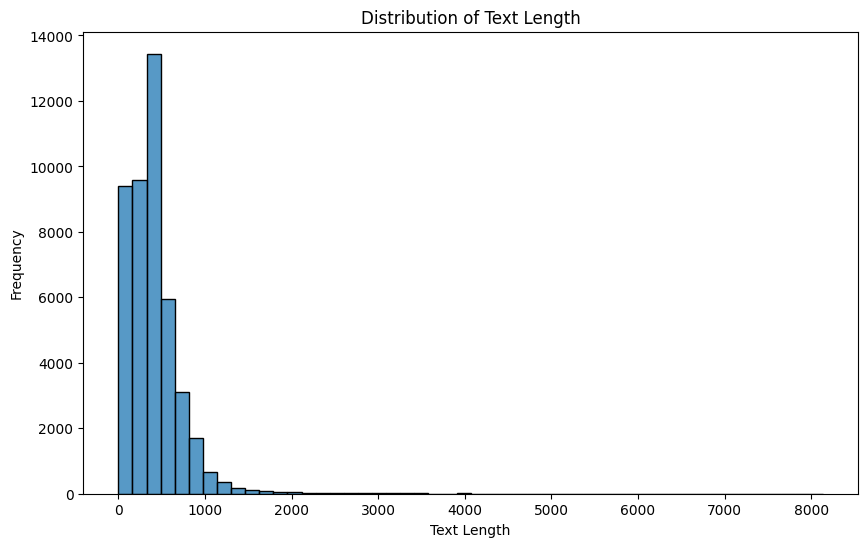

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(df["text_length"], bins = 50)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# ==============================
Advanced EDA
==============================#

Top Words:
trump: 134000
said: 132825
president: 55892
people: 41857
state: 34488
new: 31311
reuters: 29425
clinton: 28695
obama: 28203
donald: 28127
government: 28048
house: 27753
states: 26843
republican: 25568
year: 24998
just: 24967
united: 23601
told: 23367
like: 22774
white: 22745


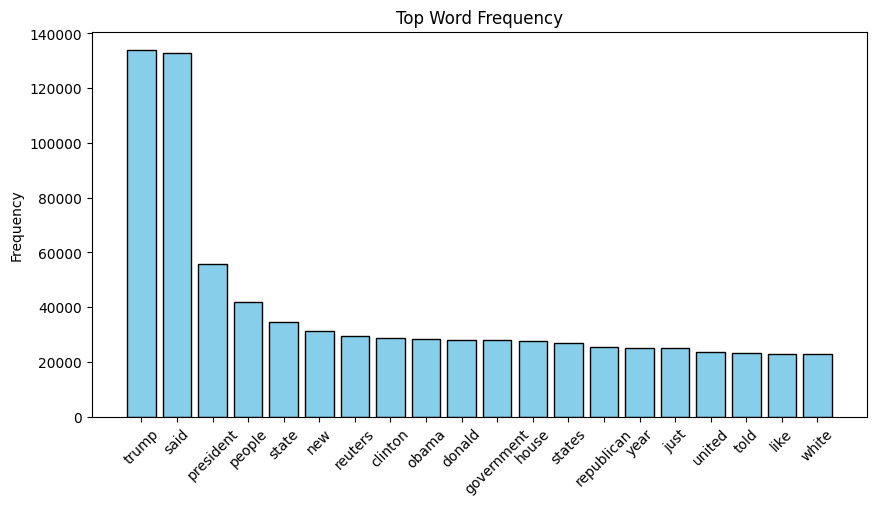

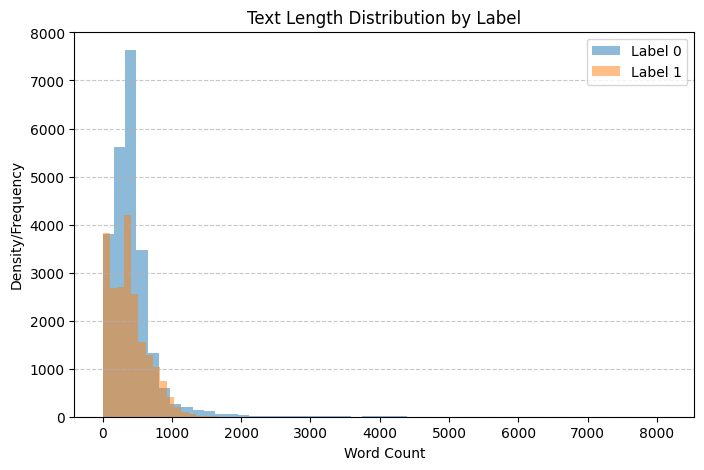


EDA Section Completed 🔍


In [ ]:
print("# " + "="*30)
print("Advanced EDA")
print("="*30+"#")

# --- 1. Top 20 Most Frequent Words ---
# Ensure 'text' column is string and drop NaNs
text_data = df['text'].astype(str)

vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(text_data)
word_counts = word_matrix.sum(axis=0)
words = vectorizer.get_feature_names_out()

# Zip and sort by frequency
freq = sorted(zip(words, np.array(word_counts).flatten()), key=lambda x: x[1], reverse=True)

print("\nTop Words:")
for word, count in freq:
    print(f"{word}: {count}")

# --- 2. Word Frequency Plot ---
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in freq], [x[1] for x in freq], color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title("Top Word Frequency")
plt.ylabel("Frequency")
plt.show()

# --- 3. Compare Text Length by Label ---
# Pre-calculation: ensure 'text_length' column exists
if 'text_length' not in df.columns:
    df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))



plt.figure(figsize=(8, 5))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['text_length'], bins=50, alpha=0.5, label=f"Label {label}")

plt.legend()
plt.title("Text Length Distribution by Label")
plt.xlabel("Word Count")
plt.ylabel("Density/Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nEDA Section Completed 🔍")

In [ ]:
from google.colab import files

# 1. Save the dataframe to the Colab environment as a CSV
df.to_csv('df.csv', index=False)

# 2. Trigger the browser download to your laptop
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>